# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [2]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cdist
# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")
pd.options.display.max_columns = None

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [3]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [4]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [5]:
#your turn
df_merge=pd.merge(df_offers,df_transactions,on='offer_id')
ex_1=pd.pivot_table(df_merge,index=['customer_name'],columns=['offer_id'],values='n',fill_value=0,aggfunc=np.sum).reset_index()
ex_1

offer_id,customer_name,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,Adams,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,Allen,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,Bailey,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Baker,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,Barnes,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
6,Bell,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
7,Bennett,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,Brooks,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,Brown,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

In [7]:
# your turn
from sklearn.cluster import KMeans
mod=KMeans()
mod.fit(ex_1.iloc[:,1:])
# mod.cluster_centers_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

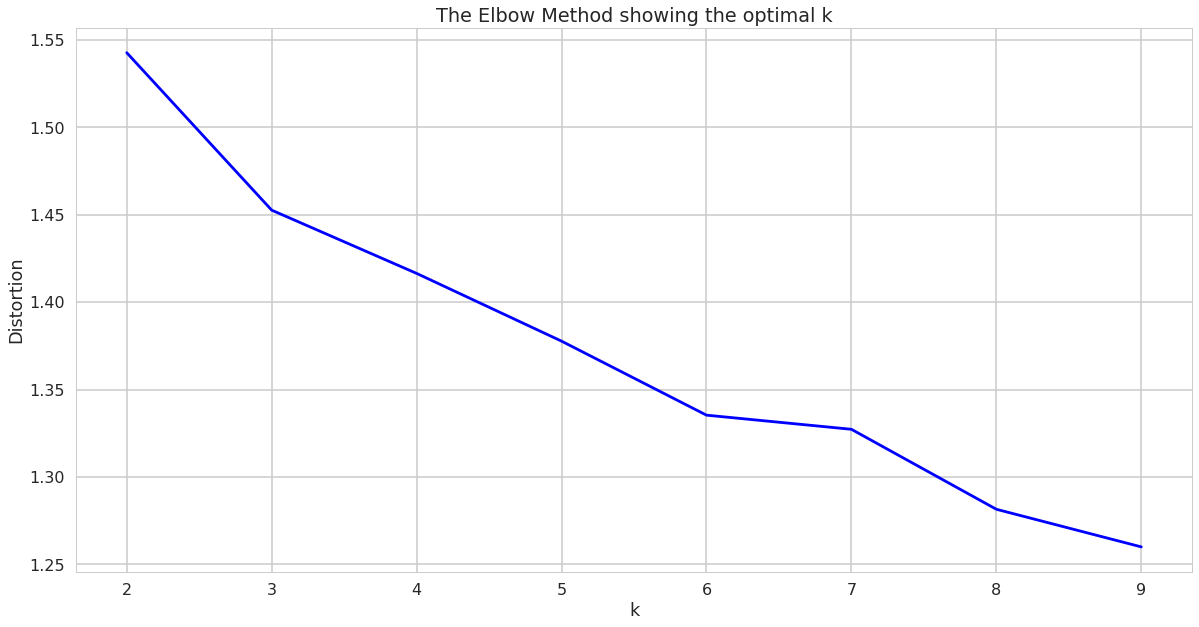

In [46]:
distortions = []
K = range(2,10)
for k in K:
#     print('k value is {}'.format(k))
    kmeanModel = KMeans(n_clusters=k,random_state=23).fit(ex_1.iloc[:,1:].values)
#     kmeanModel.fit(ex_1.iloc[:,1:])
    distortions.append(sum(np.min(cdist(ex_1.iloc[:,1:], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / ex_1.iloc[:,1:].shape[0])

plt.figure(figsize=(20,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(range(2,10))
plt.show()

The main challenges of this Elbow method is: 
    IN case of any elbow like shape in the graph we can choose that point as optimal cluster, but what if we dont find an elbow
    shape, because we cant expect real time data to have elbow shape in Distance vs cluster curves.
Moreover, After picking the Ideal cluster number from the elbow plot its often difficult to common behaviour within the cluster.

[43, 25, 32]


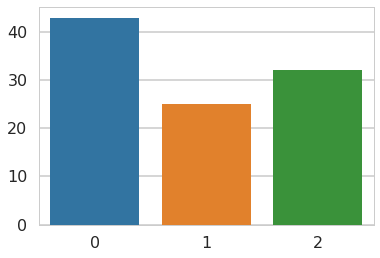

[11, 18, 18, 7, 13, 33]


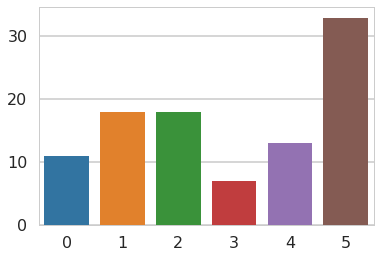

[18, 21, 15, 10, 5, 17, 14]


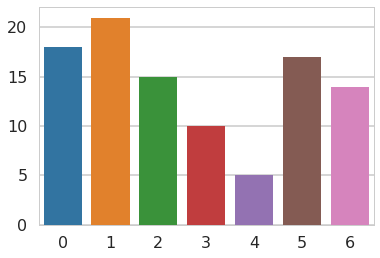

In [29]:
# From the graph, Can see a elbow pattern near 3, 6,7 clusters, Hence Trying out with 3,6,7 clusters
for y in [3,6,7]:
    
    len_li=[]
    n_cluster=y
    mod_f=KMeans(n_clusters=n_cluster)
    mod_f.fit(ex_1.iloc[:,1:])
    res_df=pd.DataFrame(data=np.c_[ex_1.iloc[:,1:],mod_f.fit_predict(ex_1.iloc[:,1:])],columns=list(ex_1.columns[1:])+['pred'])
    for x in range(0,n_cluster):
        len_li.append(len(res_df[res_df.pred==x].index))
    
    print(len_li)
    sns.barplot(x=list(range(0,y)),y=len_li)
    plt.show()
    
    
    

In [64]:
mod_f=KMeans(n_clusters=5,random_state=23)
mod_f.fit(ex_1.iloc[:,1:])
res_df=pd.DataFrame(data=np.c_[ex_1.iloc[:,:],mod_f.fit_predict(ex_1.iloc[:,1:].values)],columns=list(ex_1.columns)+['pred'])

    
#     li=[]
#     for z in range(0,res_df[res_df.pred==x].shape[0]):
#         for k,l in zip(res_df.iloc[z,:-1].values,res_df.iloc[z,:-1].index):
#             if k!=0:
#                 li.append(l)
#     print(x,set(li))

In [65]:
ex_1['pred']=mod_f.fit_predict(ex_1.iloc[:,1:])

In [66]:
pd.merge(df_offers,pd.merge(df_transactions,ex_1[['customer_name','pred']])).shape

(324, 10)

In [67]:
df=pd.merge(df_transactions,ex_1[['customer_name','pred']])
df=pd.merge(df_offers,df)
print(df.varietal.value_counts())
for x in list(set(df.pred)):
    print('Cluster {}'.format(x))
    print(df[df.pred==x]['varietal'].value_counts())


Champagne             81
Pinot Noir            44
Prosecco              43
Espumante             40
Cabernet Sauvignon    32
Malbec                32
Merlot                20
Pinot Grigio          17
Chardonnay            15
Name: varietal, dtype: int64
Cluster 0
Pinot Noir    35
Champagne      1
Prosecco       1
Malbec         1
Chardonnay     1
Name: varietal, dtype: int64
Cluster 1
Champagne             35
Prosecco              15
Cabernet Sauvignon    14
Espumante             13
Chardonnay             5
Pinot Noir             4
Merlot                 3
Pinot Grigio           1
Malbec                 1
Name: varietal, dtype: int64
Cluster 2
Espumante             22
Malbec                18
Pinot Grigio          16
Prosecco              12
Merlot                 7
Cabernet Sauvignon     2
Chardonnay             1
Champagne              1
Name: varietal, dtype: int64
Cluster 3
Champagne             24
Cabernet Sauvignon    16
Malbec                12
Merlot                10
Chardonna

# From the above analysis we can see that cluster 0 almost contains all the Pinot Noir variety.

In [68]:
df.groupby(['pred'])['min_qty'].mean()
# print(df.varietal.value_counts())
for x in list(set(df.pred)):
    print('Cluster {}'.format(x))
    print('Cluster Mean of min_qty ',df[df.pred==x]['min_qty'].mean())
    print('Non cluster mean of min_qty',df[df.pred!=x]['min_qty'].mean())

Cluster 0
Cluster Mean of min_qty  61.23076923076923
Non cluster mean of min_qty 58.02105263157895
Cluster 1
Cluster Mean of min_qty  66.79120879120879
Non cluster mean of min_qty 55.13304721030043
Cluster 2
Cluster Mean of min_qty  10.329113924050633
Non cluster mean of min_qty 73.91020408163266
Cluster 3
Cluster Mean of min_qty  88.5925925925926
Non cluster mean of min_qty 48.34567901234568
Cluster 4
Cluster Mean of min_qty  72.52941176470588
Non cluster mean of min_qty 56.751724137931035


From the above analysis cluster 3 contains High mean for min_qty it can be interepreted as Products in this cluster are brought
high quantities.(Wrong)
From the above analysis cluster 3 contains Customers that have high purchase  minimum quantities.
Similarly , Cluster 2 contains customer who purchase in relatively less minimum quantities. 

In [73]:
df.groupby(['pred'])['discount'].mean()
# print(df.varietal.value_counts())
for x in list(set(df.pred)):
    print('Cluster {}'.format(x))
    print('Cluster Mean of discount ',df[df.pred==x]['discount'].mean())
    print('Non cluster mean of discount',df[df.pred!=x]['discount'].mean())

Cluster 0
Cluster Mean of discount  48.82051282051282
Non cluster mean of discount 60.940350877192984
Cluster 1
Cluster Mean of discount  64.35164835164835
Non cluster mean of discount 57.5793991416309
Cluster 2
Cluster Mean of discount  56.860759493670884
Non cluster mean of discount 60.326530612244895
Cluster 3
Cluster Mean of discount  60.03703703703704
Non cluster mean of discount 59.2962962962963
Cluster 4
Cluster Mean of discount  63.44117647058823
Non cluster mean of discount 59.01724137931034


# Silhouette Analysis

In [ ]:
bx=Min(mean of distance between that point to other point in rem clusters)
ax=(mean of distance between that point to rem points in its cluster)
Silhouette score for a give point is :(bx-ax)/(max(ax,bx))

In [80]:
from sklearn.metrics import silhouette_samples, silhouette_score

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

For n_clusters = 2 The average silhouette_score is : 0.0936557328349
For n_clusters = 3 The average silhouette_score is : 0.118899428636
For n_clusters = 4 The average silhouette_score is : 0.123470539196
For n_clusters = 5 The average silhouette_score is : 0.14092516242
For n_clusters = 6 The average silhouette_score is : 0.137179893911
For n_clusters = 7 The average silhouette_score is : 0.116109245662
For n_clusters = 8 The average silhouette_score is : 0.113395738326
For n_clusters = 9 The average silhouette_score is : 0.125059605278
For n_clusters = 10 The average silhouette_score is : 0.119283321348


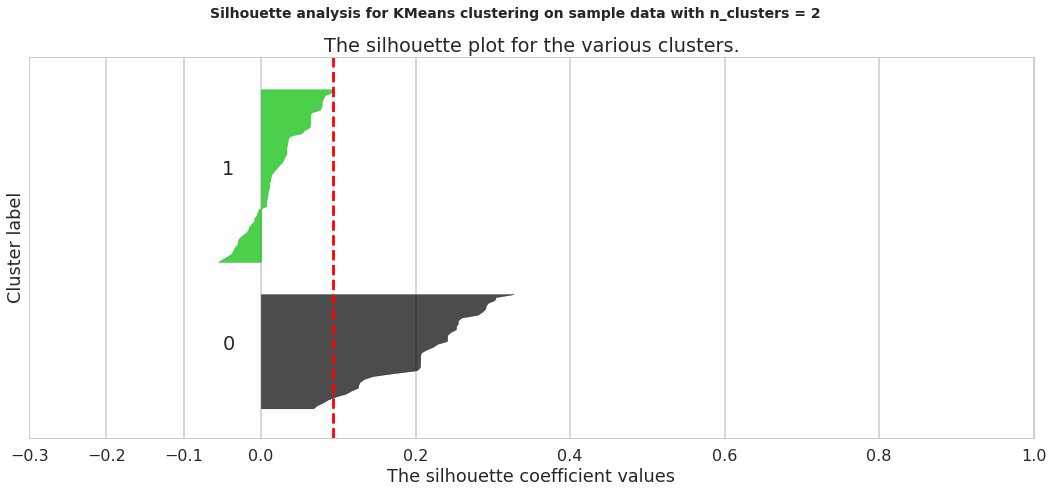

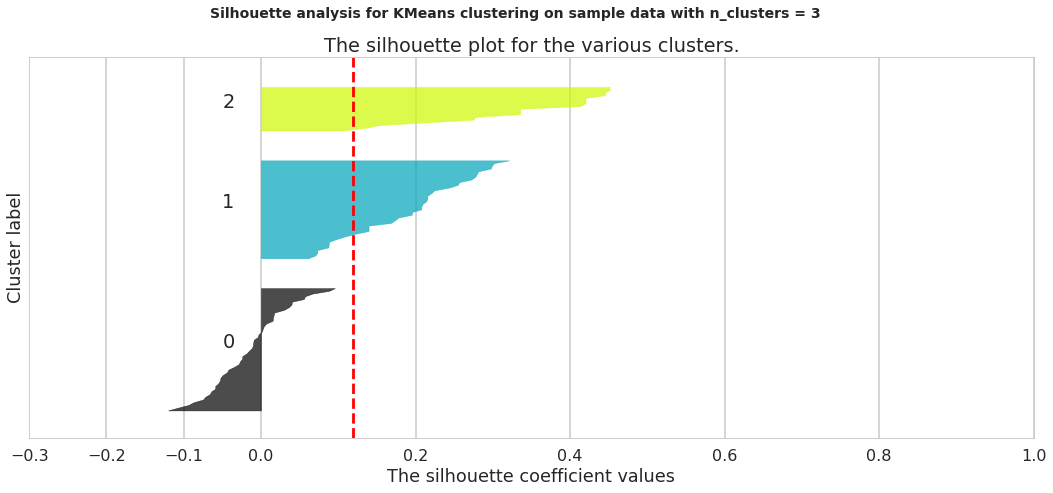

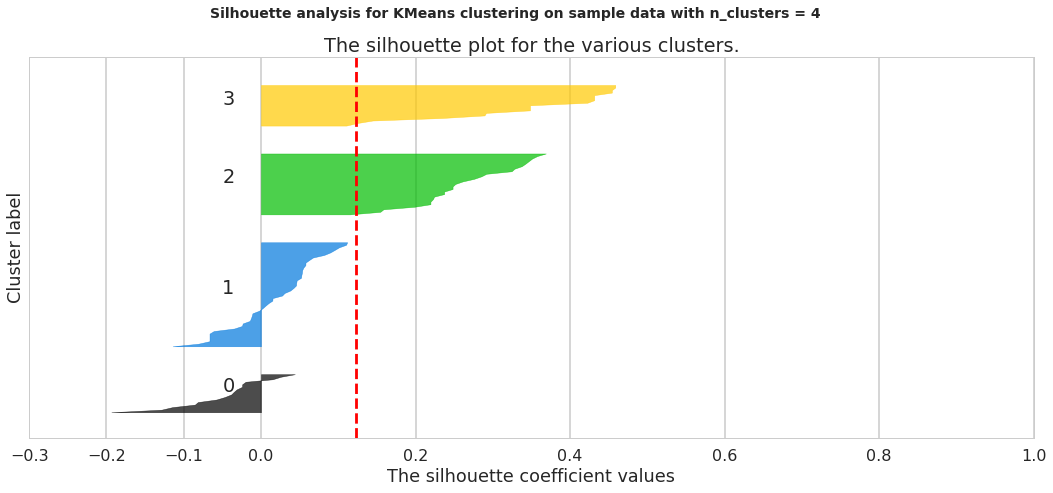

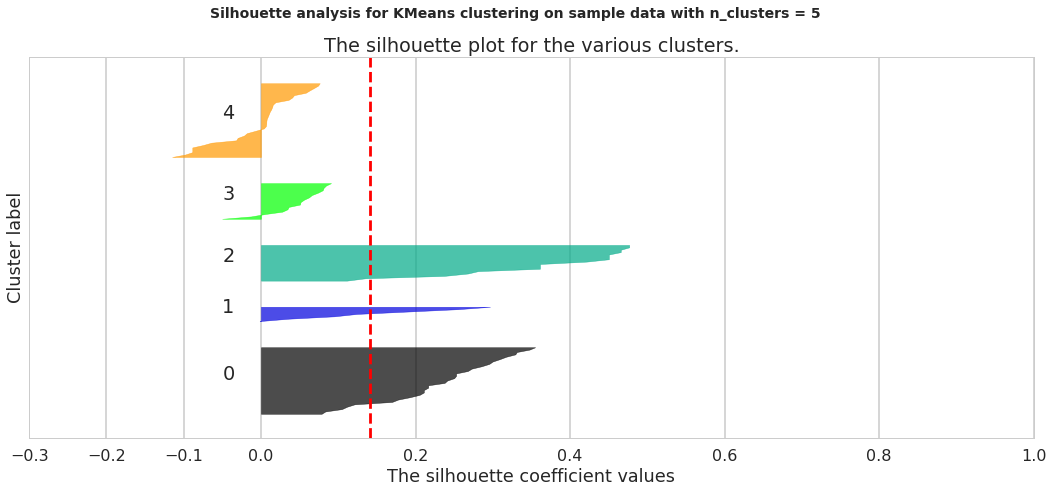

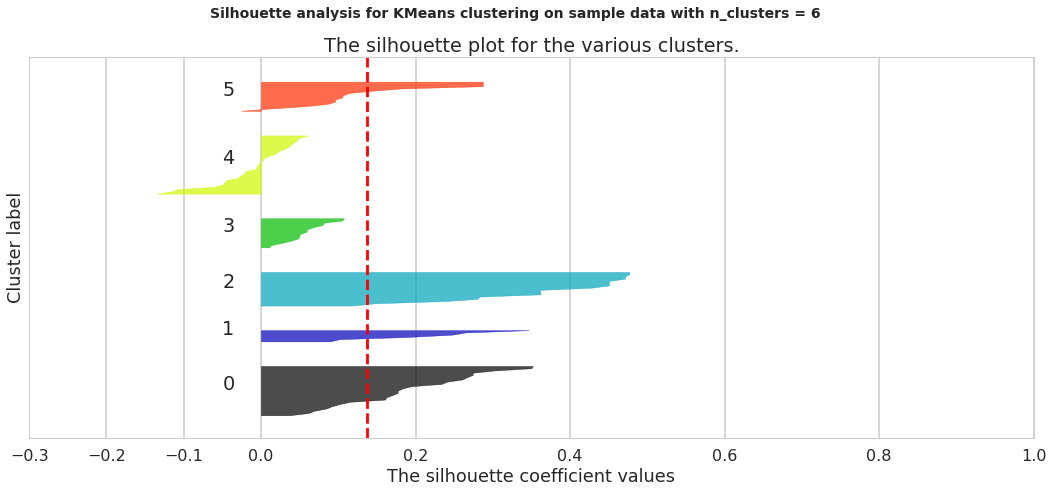

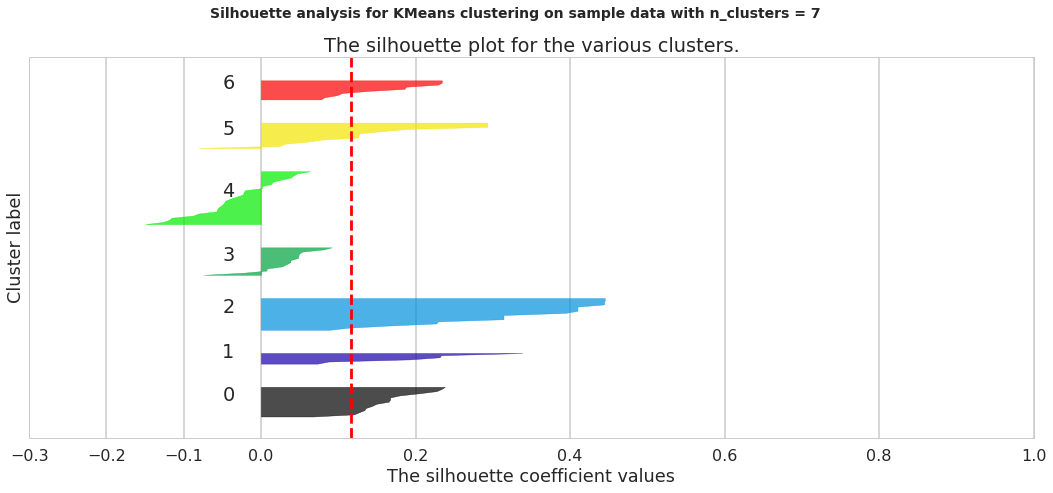

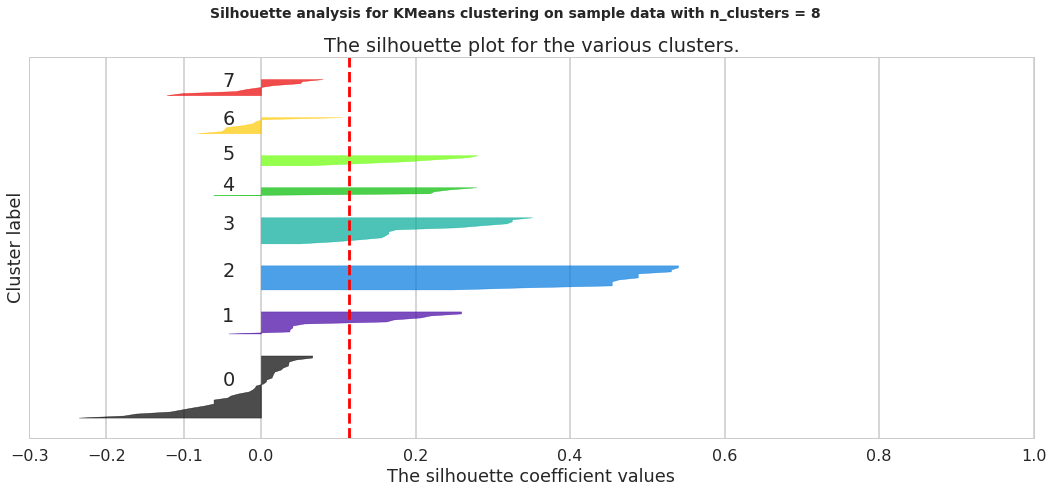

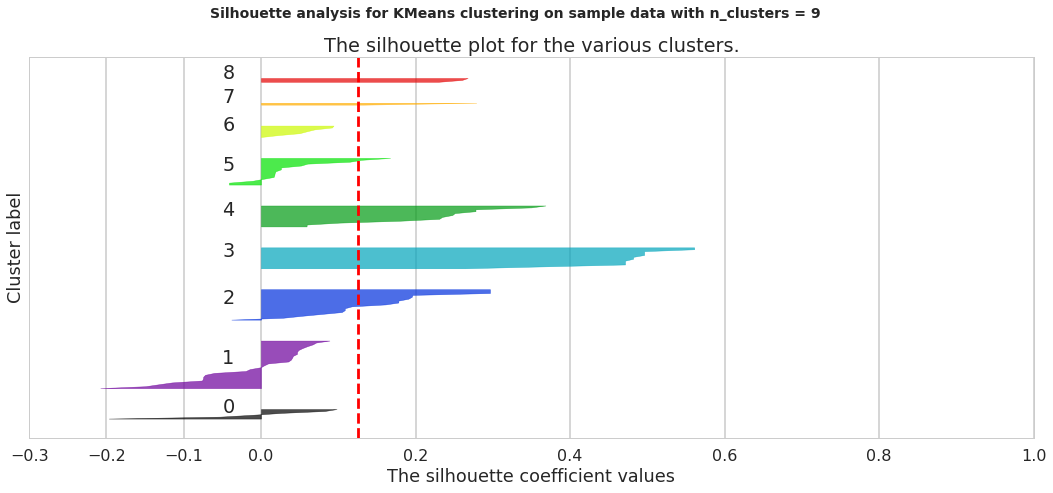

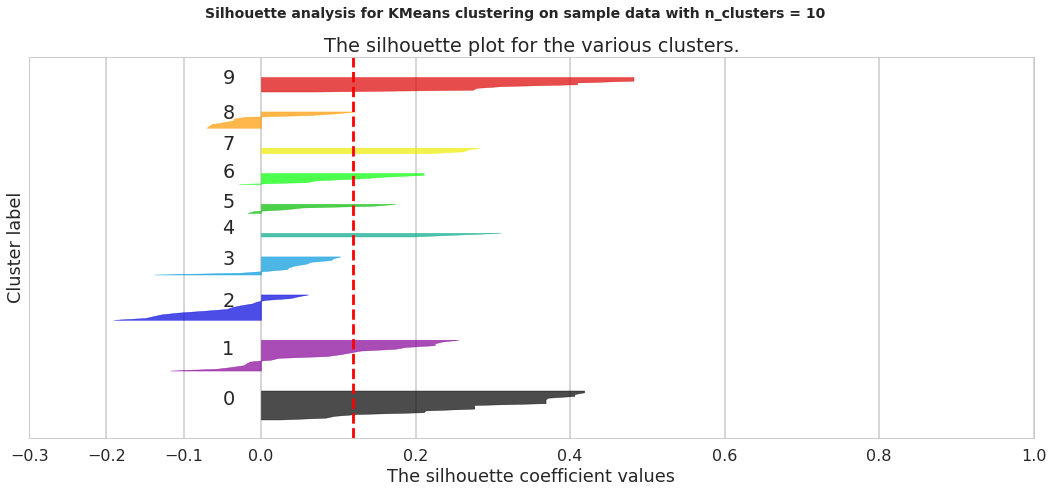

In [48]:
# Your turn.
import matplotlib.cm as cm
range_n_clusters = range(2,11)
avg_silhouette=[]
# [3,6,7,11,12,16,17,19,20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(ex_1.iloc[:,1:]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(ex_1.iloc[:,1:].values)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(ex_1.iloc[:,1:].values, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(ex_1.iloc[:,1:].values, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


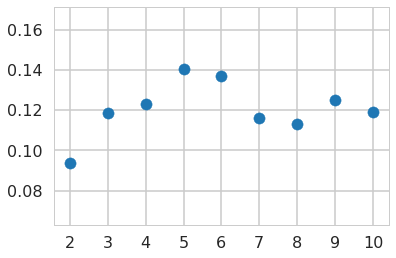

In [49]:
# Plot of average silhouette scores for different cluster values
plt.scatter(x=range(2,11),y=avg_silhouette)
plt.xticks(range(2,11))
plt.show()

From the elbow plot we have gone with 3, 6, 7 clusters, But when looking at the average silhouette coefficients for each of the cluster
the value of coefficient is in range of 0.10 to 0.15 which is very low and as per above table it can be interpreted  that:
    No substantial structures can be identified.

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

In [34]:
#your turn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(ex_1.iloc[:,1:].values)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

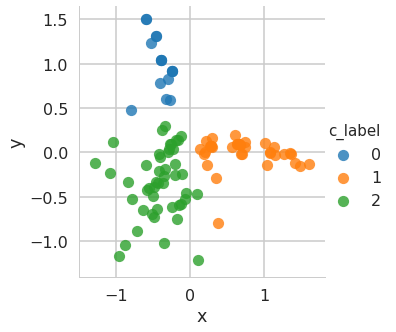

In [35]:
df_plot=pd.DataFrame(np.c_[res_df.customer_name,res_df.pred,(pca.transform(ex_1.iloc[:,1:].values))],columns=['c_name','c_label','x','y'])
sns.lmplot(x='x',y='y',hue='c_label',data=df_plot,fit_reg=False)

What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

([<matplotlib.axis.XTick at 0x7f638448a128>,
 <a list of 32 Text xticklabel objects>)

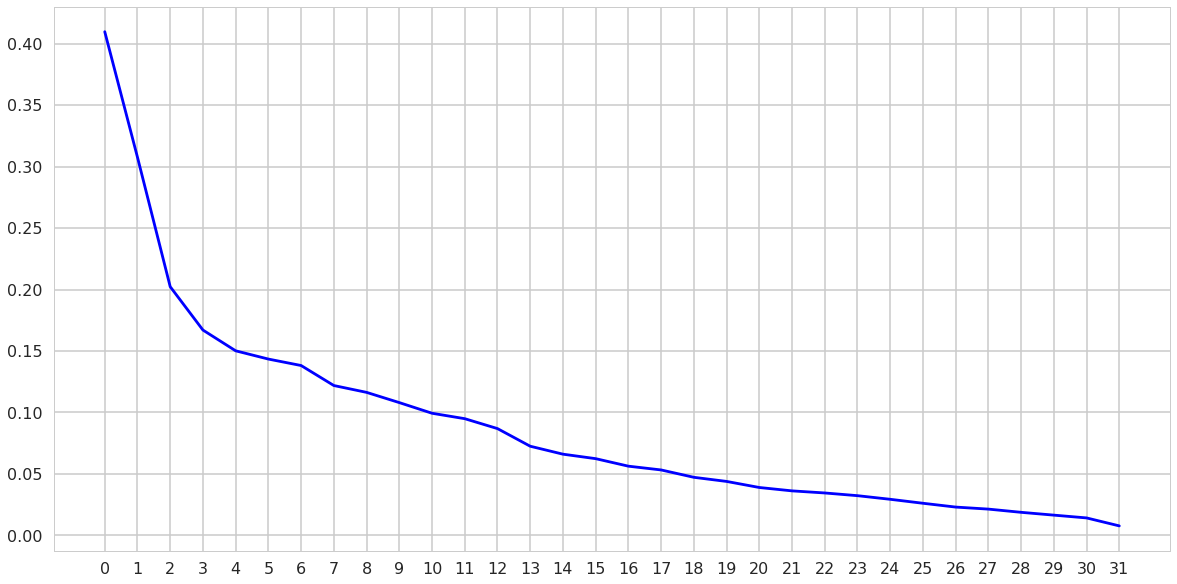

In [81]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA(random_state=23)
pca.fit(ex_1.iloc[:,1:])
# Do the rest on your own :)
plt.figure(figsize=(20,10))
plt.plot(range(0,32),pca.explained_variance_,'bx-')
plt.xticks(range(0,32))


# From the above plot after 2 Dimensions the expected_varience slows down sharply. Hence answer is 2 

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


# DBSCAN

In [29]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
db=DBSCAN().fit(ex_1.iloc[:,1:].values)

In [30]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [31]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

Since all the points are termed as noise by using default parameters, Changing the parameters of algorithm.

In [32]:
min_points=2*ex_1.iloc[:,1:].shape[1]
db=DBSCAN(eps=10,min_samples=min_points).fit(ex_1.iloc[:,1:].values)
labels=db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_

1

Applying DBSCAN on two components of PCA

In [128]:
db=DBSCAN(eps=0.05,min_samples=5).fit(df_plot[['x','y']].values)
labels=db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_

2

Even though after trying DBSCAN with different parameters,it is not able to arrange data into clusters.

<Figure size 1440x1440 with 0 Axes>

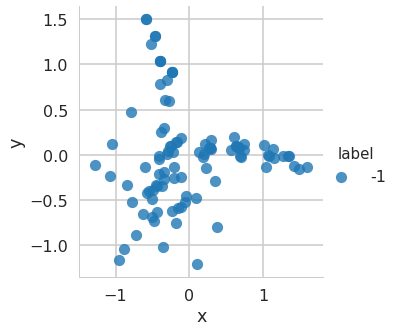

In [127]:
db_plot=pd.DataFrame(np.c_[db.labels_,df_plot[['x','y']].values],columns=['label','x','y'])
plt.figure(figsize=(20,20))
sns.lmplot('x','y',hue='label',data=db_plot,fit_reg=False)

# Agglomerative Clustering

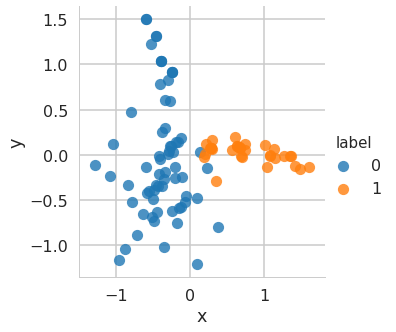

In [72]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering().fit(ex_1.iloc[:,1:].values)
df_agg=pd.DataFrame(data=np.c_[df_plot[['x','y']],agg.fit_predict(ex_1.iloc[:,1:].values)],columns=['x','y','label'])
sns.lmplot('x','y',hue='label',data=df_agg,fit_reg=False)

No improvement in silhouette scores for the clusters using Agglomerative clustering

For n_clusters = 2 The average silhouette_score is : 0.0825801782318
For n_clusters = 3 The average silhouette_score is : 0.116258788636
For n_clusters = 4 The average silhouette_score is : 0.128937578159
For n_clusters = 5 The average silhouette_score is : 0.140897399708
For n_clusters = 6 The average silhouette_score is : 0.147152172046
For n_clusters = 7 The average silhouette_score is : 0.152751527511
For n_clusters = 8 The average silhouette_score is : 0.155780537186
For n_clusters = 9 The average silhouette_score is : 0.12075124132
For n_clusters = 10 The average silhouette_score is : 0.0975475074715


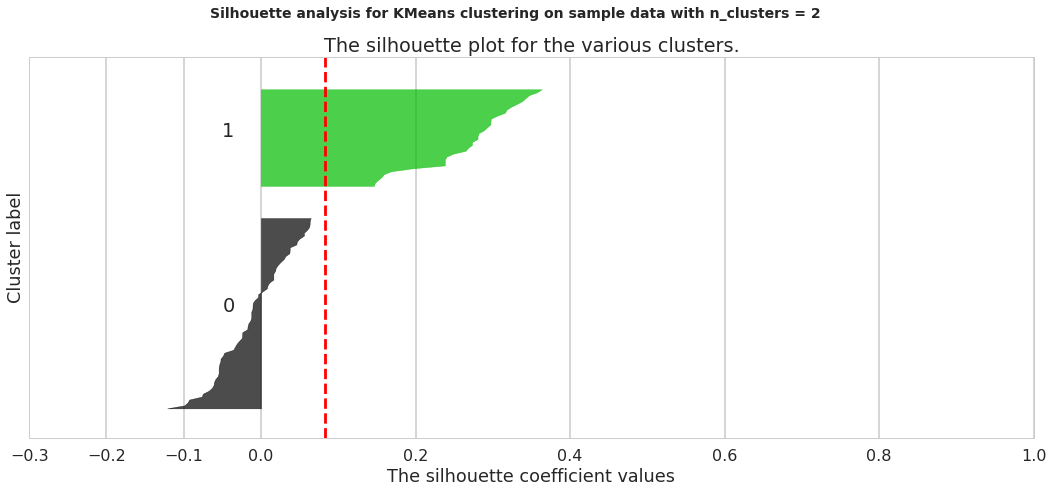

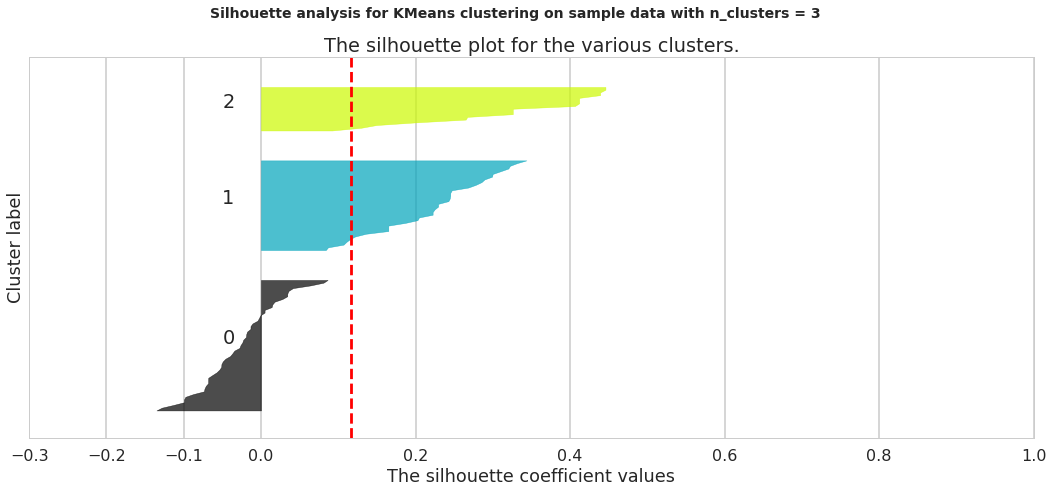

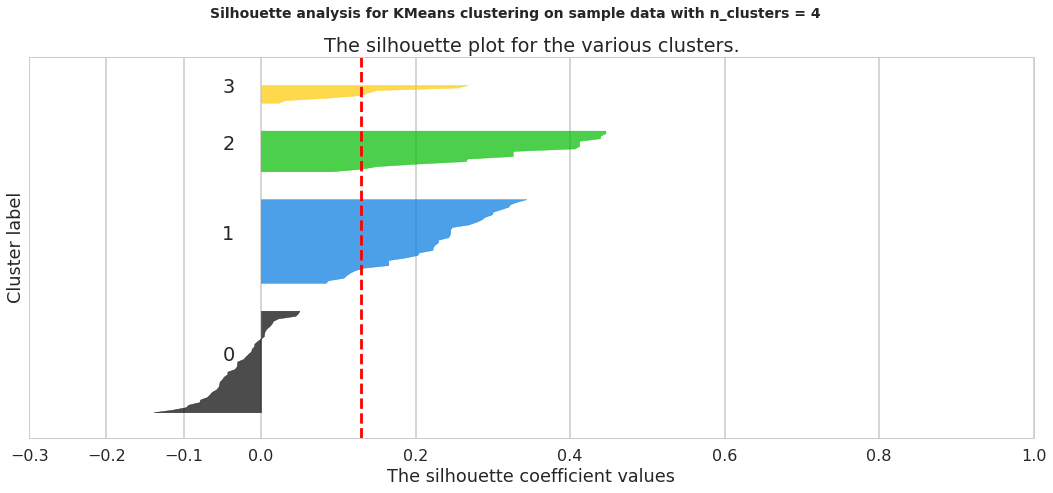

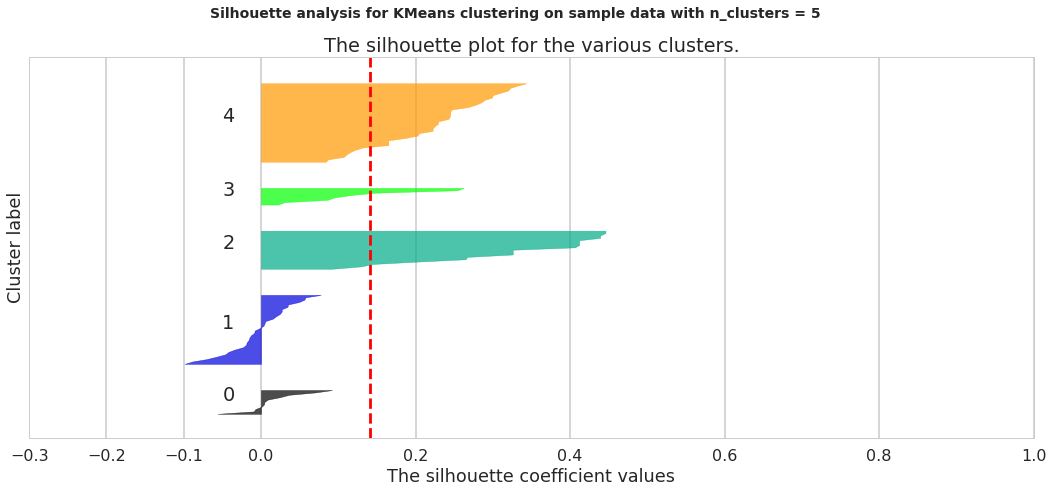

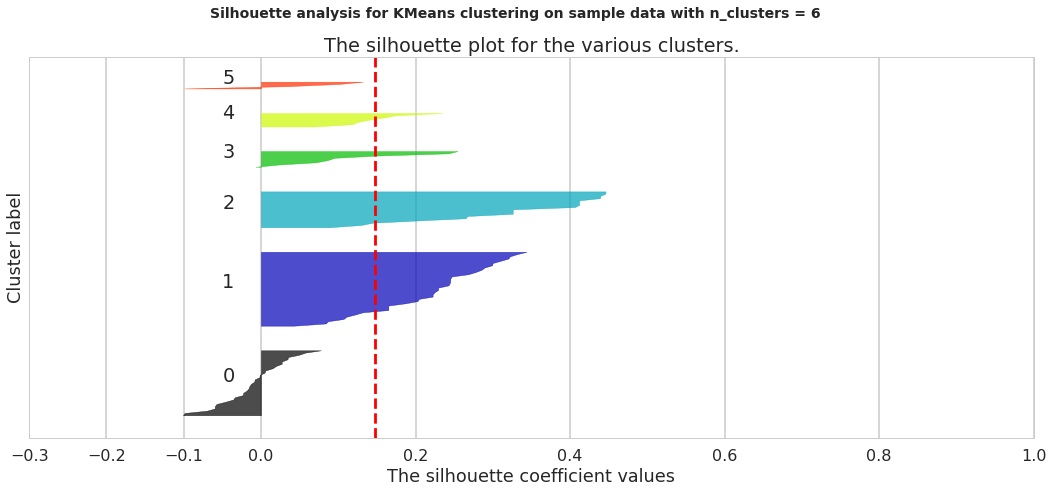

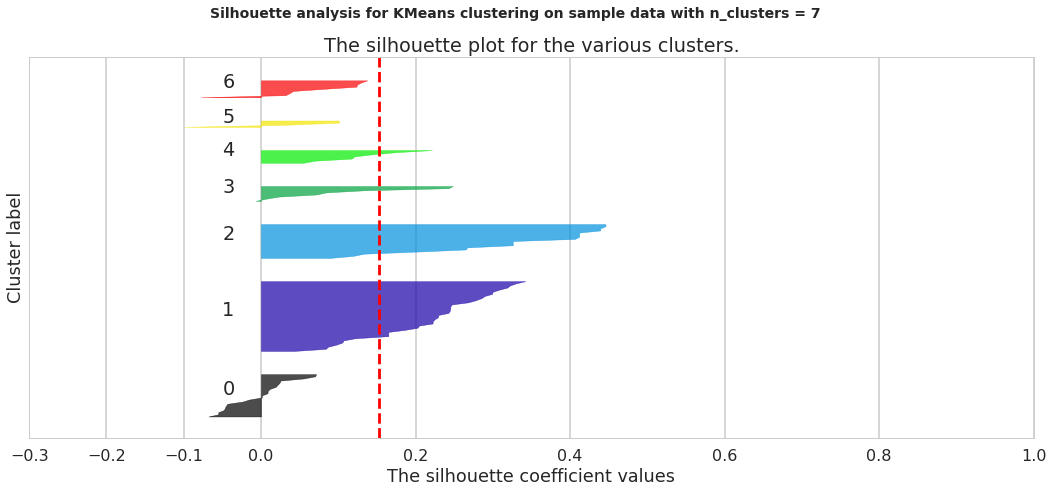

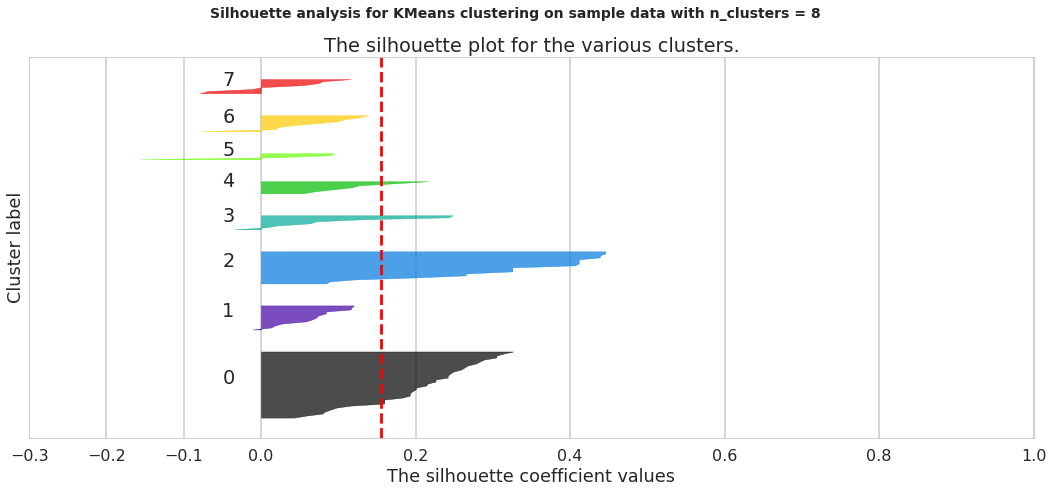

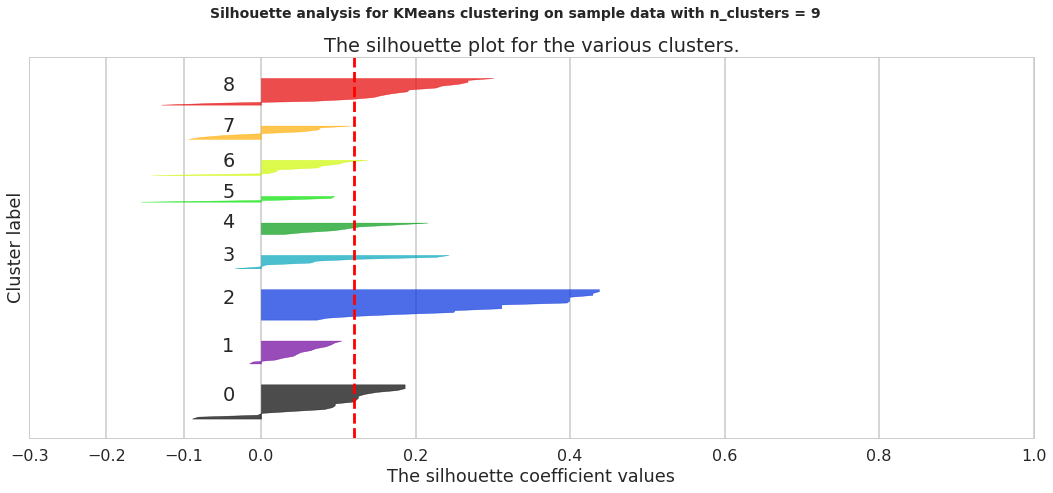

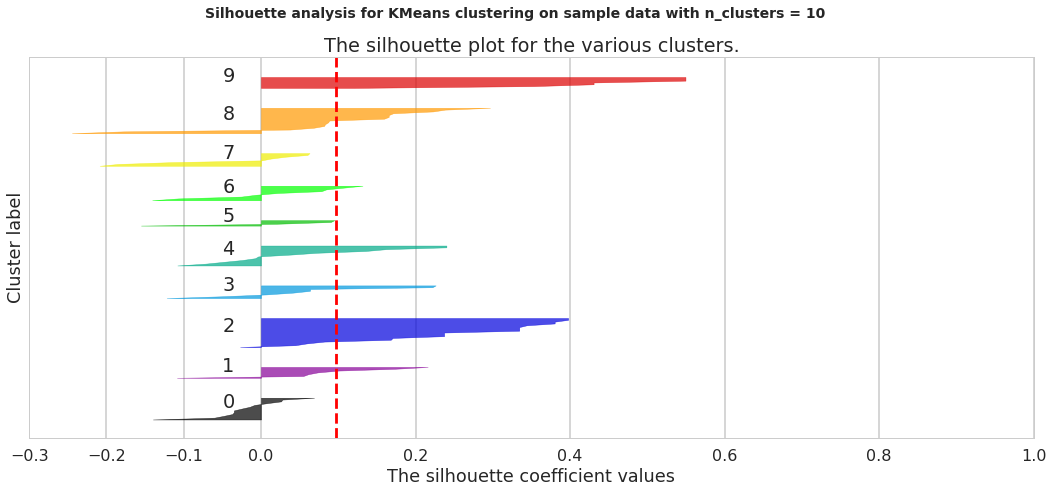

In [77]:
import matplotlib.cm as cm
range_n_clusters = range(2,11)
avg_silhouette=[]
# [3,6,7,11,12,16,17,19,20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(ex_1.iloc[:,1:]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer =AgglomerativeClustering(n_clusters=n_clusters).fit(ex_1.iloc[:,1:].values)
    cluster_labels = clusterer.fit_predict(ex_1.iloc[:,1:].values)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(ex_1.iloc[:,1:].values, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(ex_1.iloc[:,1:].values, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


# Affinity Propogation

In [6]:
from sklearn.cluster import AffinityPropagation

In [136]:

mod=AffinityPropagation()
mod.fit(ex_1.iloc[:,1:].values)


AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

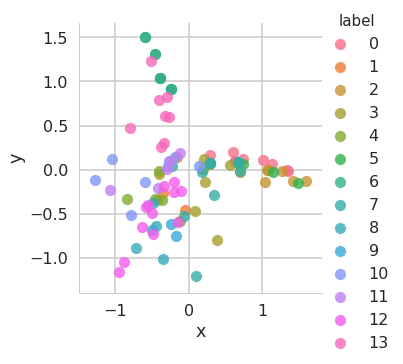

In [137]:
aprop=pd.DataFrame(np.c_[df_plot[['x','y']],mod.labels_],columns=['x','y','label'])
sns.lmplot(x='x',y='y',hue='label',data=aprop,fit_reg=False)

In [77]:
from itertools import groupby
prop_df=pd.DataFrame(np.c_[ex_1,mod.labels_],columns=list(ex_1.columns)+['PRED'])
for k in range(len(set(prop_df.PRED.values))):
    li=[]
    for x in range(1,33):
        for y in (prop_df[prop_df.PRED==k].iloc[:,x].values):
            if y!=0:
                li.append(x)
    print(k,len(li))
#     for l,m in groupby(li):
#         print(l,len(list(m)))
#     print('%%%%%%%%%%%%%%%%%%%%%')
        

0 31
1 40
2 68
3 30
4 61
5 41
6 33
7 20


For n_clusters = 8 The average silhouette_score is : 0.123465236045


Text(0.5,0.98,'Silhouette analysis for KMeans clustering on sample data with n_clusters = 14')

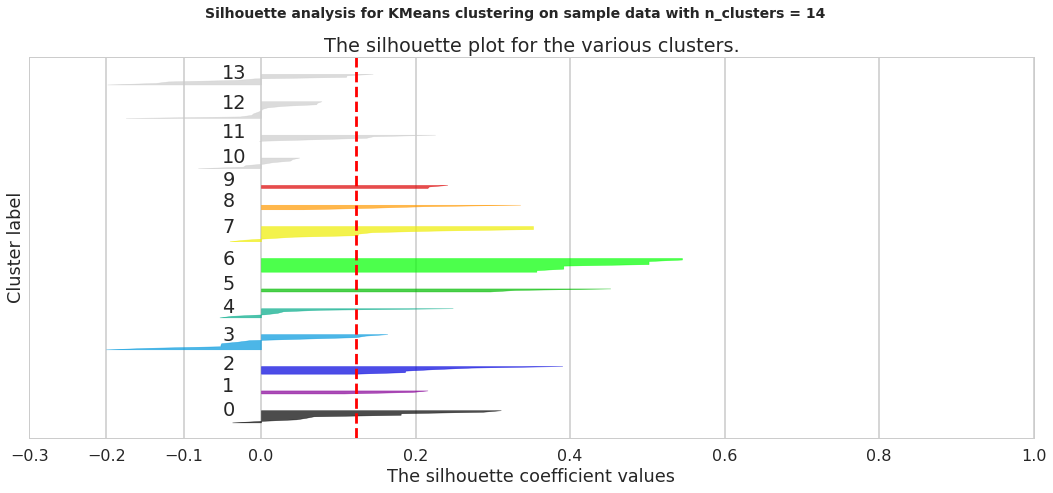

In [138]:
import matplotlib.cm as cm
# range_n_clusters = range(2,11)
avg_silhouette=[]
# [3,6,7,11,12,16,17,19,20]

# for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.3, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(ex_1.iloc[:,1:]) + (len(set(aprop.label.values)) + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer =AffinityPropagation().fit(ex_1.iloc[:,1:].values)
cluster_labels = clusterer.labels_

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(ex_1.iloc[:,1:].values, cluster_labels)
avg_silhouette.append(silhouette_avg)
print("For n_clusters =", len(set(prop_df.PRED.values)),
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(ex_1.iloc[:,1:].values, cluster_labels)

y_lower = 10
for i in range(len(set(aprop.label.values))):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.3,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % len(set(aprop.label.values))),
             fontsize=14, fontweight='bold')


There is no improvement in average silhouette scores by using Affinity Propogation

# Spectral clustering

In [139]:
from sklearn.cluster import SpectralClustering
mod_sp=SpectralClustering(n_clusters=4)
mod_sp.fit(ex_1.iloc[:,1:].values)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=4, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

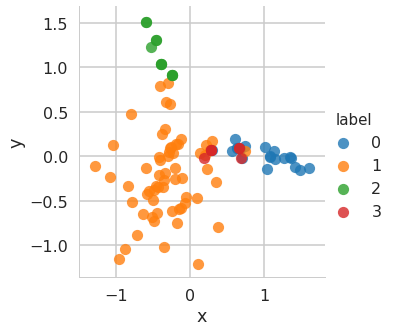

In [140]:
aprop=pd.DataFrame(np.c_[df_plot[['x','y']],mod_sp.labels_],columns=['x','y','label'])
sns.lmplot(x='x',y='y',hue='label',data=aprop,fit_reg=False)

In [ ]:
import matplotlib.cm as cm
# range_n_clusters = range(2,11)
avg_silhouette=[]
# [3,6,7,11,12,16,17,19,20]

# for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.3, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(ex_1.iloc[:,1:]) + (len(set(aprop.label.values)) + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer =AffinityPropagation().fit(ex_1.iloc[:,1:].values)
cluster_labels = clusterer.labels_

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(ex_1.iloc[:,1:].values, cluster_labels)
avg_silhouette.append(silhouette_avg)
print("For n_clusters =", len(set(prop_df.PRED.values)),
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(ex_1.iloc[:,1:].values, cluster_labels)

y_lower = 10
for i in range(len(set(aprop.label.values))):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.3,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % len(set(aprop.label.values))),
             fontsize=14, fontweight='bold')

In [ ]:
The average silhouette scores is still coming very less. 

In [ ]:
Story on Various Clustering Methods:
    1.DBSCAN:For the default parameters of sklearn, DBSCAN labelled all the points in the data as noise points, Even after 
        parameter fine tuning the results are not improved or all the data points are clustered into one cluster.
    2.Agglomerative Clustering: Based on Silhouette metrics, based on average silhouette score the clusters obtained by this
        algorithm are not substantially structured.
    3.Affinity Propogation:There is no improvement in average silhouette scores by using Affinity Propogation.
    4. Spectral Clustering: The same follows with spectral clustering as well, No improvement in average silhouette scores. 
I hope that the data is not suitable for clustering because of too many categorical columns, Even though the data can be clustered,
those clusters obtained are of not substantiable structures or reliable.
            

If the data consists of blobs or clusters  , The output of DBSCAN will be as shown below 

Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 0.945
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Silhouette Coefficient: 0.650


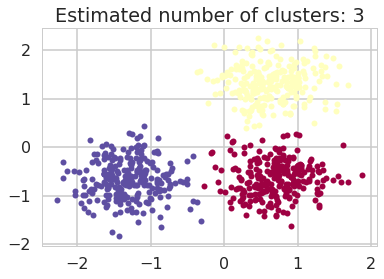

For n_clusters = 3 The average silhouette_score is : 0.649607545502


Text(0.5,0.98,'Silhouette analysis for KMeans clustering on sample data with n_clusters = 3')

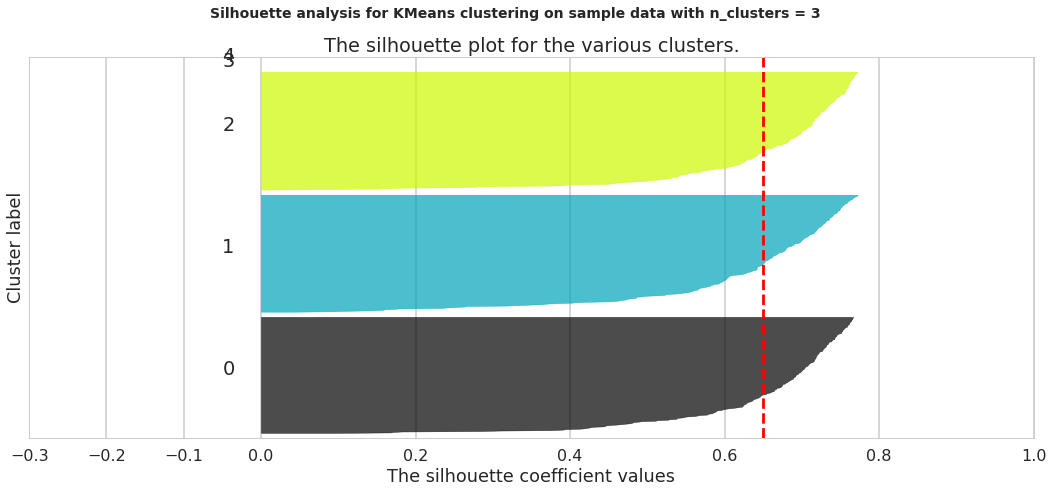

In [155]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
# db = DBSCAN(eps=0.3, min_samples=10).fit(X)
db=SpectralClustering(n_clusters=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels,
#                                            average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
import matplotlib.cm as cm
# range_n_clusters = range(2,11)
avg_silhouette=[]
# [3,6,7,11,12,16,17,19,20]

# for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.3, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (5 + 1) * 10])


# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
clusterer =SpectralClustering(n_clusters=3).fit(X)
cluster_labels = clusterer.labels_

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
avg_silhouette.append(silhouette_avg)
print("For n_clusters =", 3,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(5):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.3,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 3),
             fontsize=14, fontweight='bold')